In [2]:
# !unzip /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.zip -d /content/drive/MyDrive/인공지능/경영빅데이터/data

Archive:  /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.zip
  inflating: /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.csv  


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.csv', encoding="cp949")

## 데이터 기본 정보 파악

In [13]:
df.head()

,기업명,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,...,매출액(백만원),순이익(백만원),자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율)
0,기가비스,0,2023-05-24,2023,5,4,12,0.33,34400,39700,...,"43,973","14,264","2,121",954,0.69,0.06,0.25,12700000,3262630,0.2569
1,모니터랩,1,2023-05-19,2023,5,4,11,0.36,7500,9800,...,"12,014","2,134","1,239",196,0.74,0.01,0.25,12400000,3067550,0.2474
2,씨유박스,0,2023-05-19,2023,5,4,11,0.36,17200,23200,...,"12,273","-1,686","5,048",225,0.70,0.05,0.25,9966633,4886502,0.4903
3,트루엔,0,2023-05-17,2023,5,4,10,0.40,10000,12000,...,"35,980",852,"1,099",300,0.75,0.00,0.25,11000000,4189450,0.3809
4,에스바이오메딕스,0,2023-05-04,2023,5,7,13,0.54,16000,18000,...,"8,868","-5,242","5,496",135,0.75,0.00,0.25,11000000,2957384,0.2690


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   기업명                              528 non-null    object 
 1   종속변수                             528 non-null    int64  
 2   신규상장일                            528 non-null    object 
 3   상장년도                             528 non-null    int64  
 4   상장 시기(상장월)                       528 non-null    int64  
 5   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  528 non-null    int64  
 6   최근 3개월 공모주 수                     528 non-null    int64  
 7   최근 "따" 비율                        528 non-null    float64
 8   희망공모가_하한                         528 non-null    int64  
 9   희망공모가_상한                         528 non-null    int64  
 10  공모가                              528 non-null    int64  
 11  밴드수익률(공모가/공모가_상한)                528 non-null    float64
 12  기관경쟁률                 

In [6]:
print(df.describe())

             종속변수         상장년도  상장 시기(상장월)  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  \
count  528.000000   528.000000  528.000000                       528.000000   
mean     0.208333  2018.888258    7.651515                         3.498106   
std      0.406502     2.378113    3.456391                         3.412778   
min      0.000000  2015.000000    1.000000                         0.000000   
25%      0.000000  2017.000000    5.000000                         1.000000   
50%      0.000000  2019.000000    8.000000                         2.000000   
75%      0.000000  2021.000000   11.000000                         5.000000   
max      1.000000  2023.000000   12.000000                        17.000000   

       최근 3개월 공모주 수   최근 "따" 비율       희망공모가_하한       희망공모가_상한            공모가  \
count    528.000000  528.000000     528.000000     528.000000     528.000000   
mean      16.867424    0.209034   16750.634470   20059.488636   18410.340909   
std        6.336353    0.176051   17512.012224  

In [7]:
print(df.isnull().sum())


기업명                                0
종속변수                               0
신규상장일                              0
상장년도                               0
상장 시기(상장월)                         0
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)    0
최근 3개월 공모주 수                       0
최근 "따" 비율                          0
희망공모가_하한                           0
희망공모가_상한                           0
공모가                                0
밴드수익률(공모가/공모가_상한)                  0
기관경쟁률                              0
청약경쟁률                              0
의무보유확약                             0
주간사                                0
대표주간사                              0
IPO 주간사 순위                         0
총 공모주식 수                           0
신주모집                               0
구주매출                               0
구주매출(비율)                           0
시장구분                               0
업종                                 0
업종(대분류)한국표준산업분류(10차)               0
업종코드                               0
기업구분                               0
매

## 기업명을 숫자 id로 변환

In [16]:
df['기업명'] = pd.factorize(df['기업명'])[0]
df['기업명']


0        0
1        1
2        2
3        3
4        4
      ... 
523    523
524    524
525    525
526    526
527    527
Name: 기업명, Length: 528, dtype: int64

In [17]:
df.head()

,기업명,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,...,매출액(백만원),순이익(백만원),자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율)
0,0,0,2023-05-24,2023,5,4,12,0.33,34400,39700,...,"43,973","14,264","2,121",954,0.69,0.06,0.25,12700000,3262630,0.2569
1,1,1,2023-05-19,2023,5,4,11,0.36,7500,9800,...,"12,014","2,134","1,239",196,0.74,0.01,0.25,12400000,3067550,0.2474
2,2,0,2023-05-19,2023,5,4,11,0.36,17200,23200,...,"12,273","-1,686","5,048",225,0.70,0.05,0.25,9966633,4886502,0.4903
3,3,0,2023-05-17,2023,5,4,10,0.40,10000,12000,...,"35,980",852,"1,099",300,0.75,0.00,0.25,11000000,4189450,0.3809
4,4,0,2023-05-04,2023,5,7,13,0.54,16000,18000,...,"8,868","-5,242","5,496",135,0.75,0.00,0.25,11000000,2957384,0.2690


In [18]:
df.set_index('기업명', inplace=True)
df.head()

,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,...,매출액(백만원),순이익(백만원),자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율)
기업명,,,,,,,,,,,,,,,,,,,,,
0,0,2023-05-24,2023,5,4,12,0.33,34400,39700,43000,...,"43,973","14,264","2,121",954,0.69,0.06,0.25,12700000,3262630,0.2569
1,1,2023-05-19,2023,5,4,11,0.36,7500,9800,9800,...,"12,014","2,134","1,239",196,0.74,0.01,0.25,12400000,3067550,0.2474
2,0,2023-05-19,2023,5,4,11,0.36,17200,23200,15000,...,"12,273","-1,686","5,048",225,0.70,0.05,0.25,9966633,4886502,0.4903
3,0,2023-05-17,2023,5,4,10,0.40,10000,12000,12000,...,"35,980",852,"1,099",300,0.75,0.00,0.25,11000000,4189450,0.3809
4,0,2023-05-04,2023,5,7,13,0.54,16000,18000,18000,...,"8,868","-5,242","5,496",135,0.75,0.00,0.25,11000000,2957384,0.2690


## 불필요한 칼럼삭제

In [ ]:
df = df.drop(['column1', 'column2', 'column3'], axis=1)


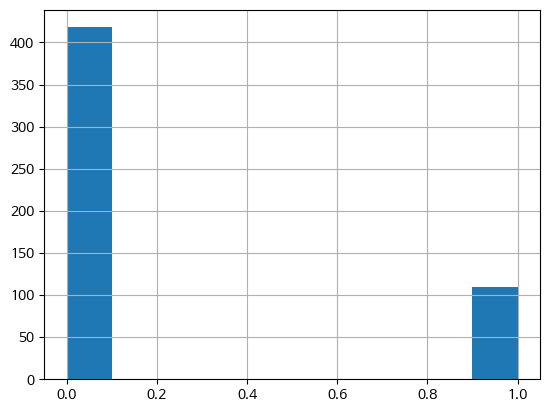

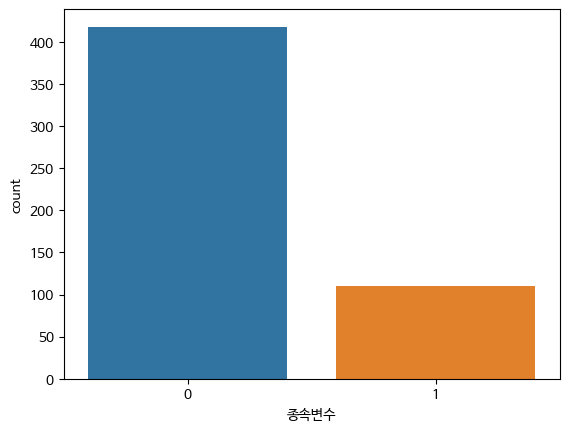

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수의 경우
df['종속변수'].hist()
plt.show()

# 범주형 변수의 경우
sns.countplot(x='종속변수', data=df)
plt.show()


In [ ]:
from scipy.stats import pointbiserialr

numeric_columns = ['numeric_column1', 'numeric_column2', ...]  # 수치형 변수들을 여기에 입력합니다.

for column in numeric_columns:
    correlation, _ = pointbiserialr(df[column], df['종속변수'])
    print(f"The correlation between {column} and target_column is {correlation}")


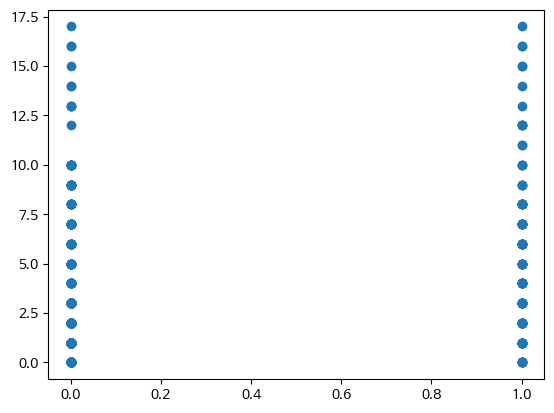

                                     종속변수  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)
종속변수                             1.000000                         0.247855
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  0.247855                         1.000000


In [14]:
# 산점도 (두 수치형 변수)
plt.scatter(df['종속변수'], df['최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)'])
plt.show()

# 상관 계수 (두 수치형 변수)
print(df[['종속변수', '최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)']].corr())



In [17]:
X = df.drop('종속변수', '기업명', axis=1)
y = df['종속변수']

# 각 피처와 목표 변수 사이의 point-biserial correlation 계산
for column in X.columns:
  print(column)

<ipython-input-17-9bc51b26cb29>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('종속변수', '기업명', axis=1)


TypeError: ignored

In [14]:
X = df.drop('종속변수', axis=1)
y = df['종속변수']

# 각 피처와 목표 변수 사이의 point-biserial correlation 계산
for column in X.columns:
    pbc = pointbiserialr(X[column], y)
    print(f"The correlation between {column} and 종속변수 is {pbc.correlation}")

ValueError: ignored